## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





__Here is the link for Github code-__
https://github.com/abrarmd29/House_Price_Analysis.git

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
df=pd.read_csv('A:\\Python\\train.csv')

__Below are the possible hypotheses for the dataset which we are going to cover__

1. Determine if the year of built affects the sale price of the house.
2. Determine if the sale price has increased based on the year of sale.
3. Determine if the street type affects the price of the house.
4. Determine if there is any relation between total square feet basement area and the price of the house.
5. Determine if the number of sales have varied over the years and which year has the highest sales.

__Determine if the year of built affects the sale price of the house__

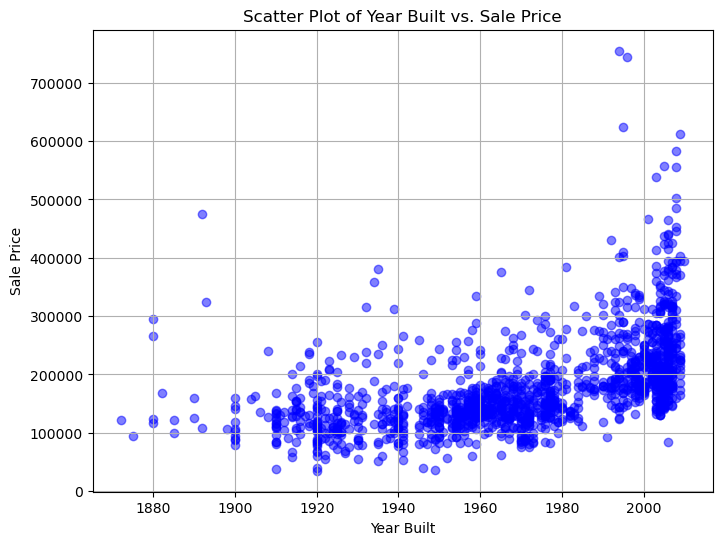

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['YearBuilt'], df['SalePrice'], c='blue', alpha=0.5)
plt.title('Scatter Plot of Year Built vs. Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)

In [79]:
bins_year = [1850, 1950, 2000, 2022] 
bins_price = [0, 100000, 200000, 300000, 500000, 1000000]
df['YearBuiltCategory'] = pd.cut(df['YearBuilt'], bins=bins_year, labels=['1850-1950', '1950-2000', '2000-2022'])
df['SalePriceCategory'] = pd.cut(df['SalePrice'], bins=bins_price)
contingency_table = pd.crosstab(df['YearBuiltCategory'], df['SalePriceCategory'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 411.88818868825433
P-value: 5.358640559461605e-84
Degrees of freedom: 8


__Determine if the sale price has increased based on the year of sale.__

Text(0.5, 1.0, 'Sale price of the house based on the year')

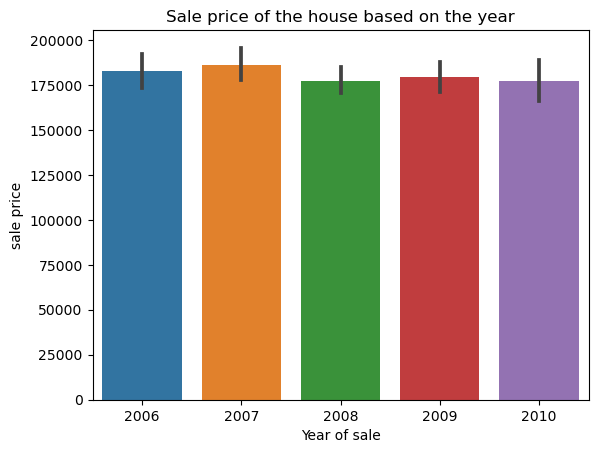

In [11]:
sns.barplot(x=df['YrSold'],y=df['SalePrice'])
plt.xlabel("Year of sale")
plt.ylabel("sale price")
plt.title("Sale price of the house based on the year")

__Determine if the street type affects the price of the house.__

Text(0.5, 1.0, 'Sale price of the house based on the street type')

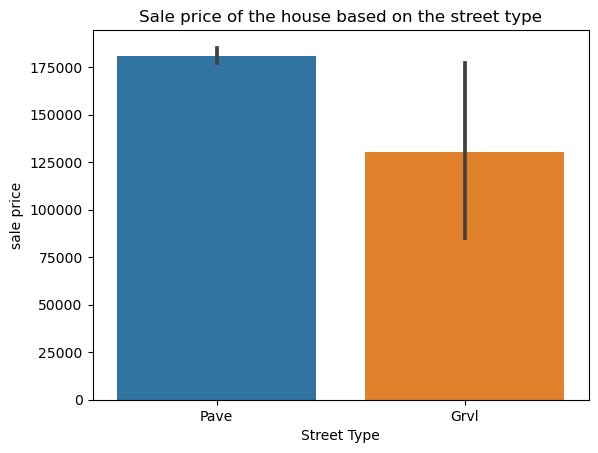

In [20]:
sns.barplot(x=df['Street'],y=df['SalePrice'])
plt.xlabel("Street Type")
plt.ylabel("sale price")
plt.title("Sale price of the house based on the street type")

__Determine if there is any relation between total square feet basement area and the price of the house__

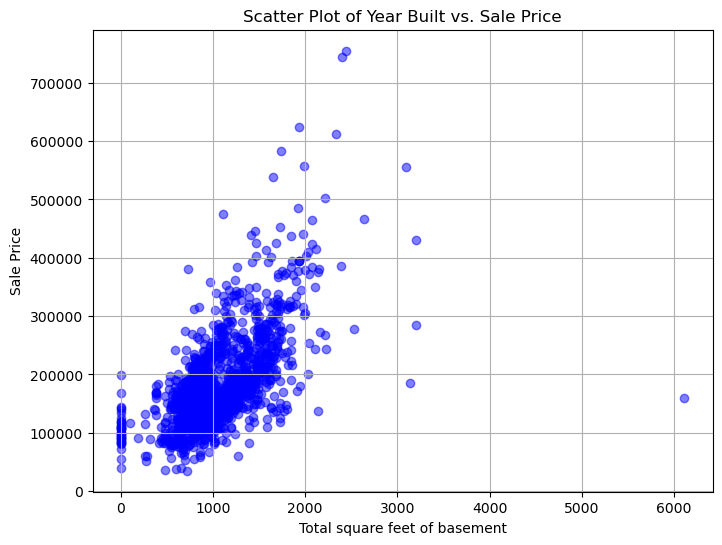

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalBsmtSF'], df['SalePrice'], c='blue', alpha=0.5)
plt.title('Scatter Plot of Year Built vs. Sale Price')
plt.xlabel('Total square feet of basement')
plt.ylabel('Sale Price')
plt.grid(True)

__Determine if the number of sales have varied over the years and which year has the highest sales.__

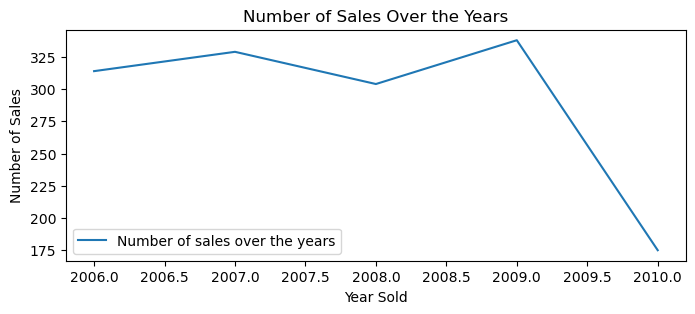

In [57]:
count_sales_year=df.groupby('YrSold')['YrSold'].count()
year_list = count_sales_year.index.tolist()
sales_counts = count_sales_year.tolist()
plt.figure(figsize=(8, 3))
plt.plot(year_list, sales_counts, label='Number of sales over the years')
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.title('Number of Sales Over the Years')
plt.legend()
plt.show()

In [82]:
count_sales_year = df.groupby('YrSold')['YrSold'].count()
max_year = count_sales_year.idxmax()
max_count = count_sales_year.max()
print("Year with the maximum sales count:",max_year)
print("Maximum sales count:",max_count)

Year with the maximum sales count: 2009
Maximum sales count: 338
